In [1]:
%pylab inline
import pandas as pd
from scipy.stats import pearsonr,spearmanr

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [23]:
import colorbm as cbm
import seaborn as sns
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))


In [4]:
import pickle 
with open('/nfs/DeepCDR/DeepCDR-master/data/processed.pkl','rb') as f:
    datafeature = pickle.load(f)

In [5]:
datafeature.keys()

dict_keys(['mutation_feature', 'drug_feature', 'gexpr_feature', 'methylation_feature', 'data_idx'])

## Read metadata

In [8]:
import pickle 
with open('/nfs/DeepCDR/DeepCDR-master/data/dataprocessed.pkl','rb') as f:
    dataidxall = pickle.load(f)

In [9]:
metadata_test = pd.DataFrame(dataidxall[2],columns=['CellLine','pubchem_id','IC50','Cancer_type'])
metadata_train = pd.DataFrame(dataidxall[1],columns=['CellLine','pubchem_id','IC50','Cancer_type'])
metadata_all = pd.DataFrame(dataidxall[0],columns=['CellLine','pubchem_id','IC50','Cancer_type'])

In [10]:
metadata_test.shape

(4729, 4)

In [11]:
metadata_train.shape

(89585, 4)

In [12]:
metadata_all.Cancer_type.value_counts().shape

(31,)

In [13]:
metadata_all.CellLine.value_counts().shape

(561,)

In [14]:
metadata_all.pubchem_id.value_counts().shape

(223,)

In [15]:
metadata_all.shape

(107446, 4)

In [16]:
prednpz = np.load('/nfs/DeepCDR/DeepCDR-master/published/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_50M-0.1B-res.npz')

In [17]:
basePrednpz = np.load('/nfs/DeepCDR/DeepCDR-master/published/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP.npz')

In [18]:
baseallPred_npz = np.load('/nfs/DeepCDR/DeepCDR-master/published/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP.npz')
predall_npz = np.load('/nfs/DeepCDR/DeepCDR-master/published/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_50M-0.1B-res.npz')

In [19]:
metadata_test['IC50_50M_01Bres']=prednpz['pred']
metadata_test['IC50_Base']=basePrednpz['pred']
metadata_test['IC50_50M_01Bres_all']=predall_npz['pred']
metadata_test['IC50_Base_all']=baseallPred_npz['pred']

In [20]:
allcancer = metadata_test.Cancer_type.unique().tolist()
alldrug = metadata_test.pubchem_id.unique().tolist()
allcellline = metadata_test.CellLine.unique().tolist()

(0.08, 1.0)

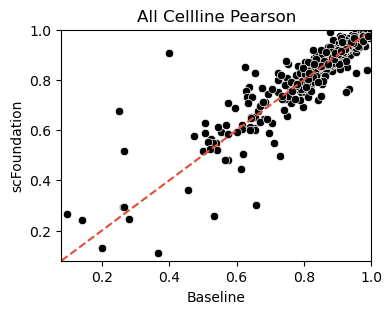

In [27]:
rest_cancer = []
for can in allcellline:
    selectmeta = metadata_test[metadata_test.CellLine==can].copy()
    if selectmeta.shape[0]<2:
        continue
    scFoundationpear = pearsonr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    scFoundationspear = spearmanr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    basepear = pearsonr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    basespear = spearmanr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    rest_cancer.append([can,scFoundationpear,scFoundationspear,basepear,basespear,scFoundationpear-basepear,scFoundationspear-basespear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','scFoundation_P','scFoundation_S','Base_P','Base_S','Diff_P','Diff_S'])

figsize(4,3)
sns.scatterplot(data=rest_cancer,x='Base_P',y='scFoundation_P',color='black')
sns.lineplot(x=[0.08,0.98],y=[0.08,0.98],linestyle='--')
plt.title('All Cellline Pearson')
plt.xlabel('Baseline')
plt.ylabel('scFoundation')
plt.xlim(0.08,1)
plt.ylim(0.08,1)

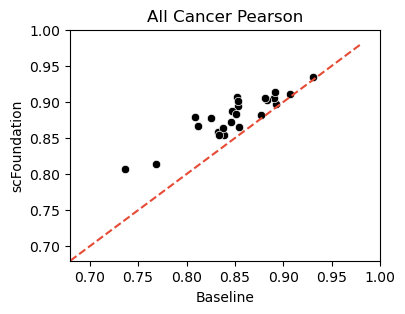

In [28]:
rest_cancer = []
for can in allcancer:
    selectmeta = metadata_test[metadata_test.Cancer_type==can].copy()
    scFoundationpear = pearsonr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    scFoundationspear = spearmanr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    basepear = pearsonr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    basespear = spearmanr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    rest_cancer.append([can,scFoundationpear,scFoundationspear,basepear,basespear,scFoundationpear-basepear,scFoundationspear-basespear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','scFoundation_P','scFoundation_S','Base_P','Base_S','Diff_P','Diff_S'])


scFoundationpear = np.array([0.8822,0.8806,0.8803])
basepear = np.array([0.8372,0.8499,0.8377])

figsize(4,3)
sns.scatterplot(data=rest_cancer,x='Base_P',y='scFoundation_P',color='black')
sns.lineplot(x=[0.68,0.98],y=[0.68,0.98],linestyle='--')
plt.title('All Cancer Pearson')
plt.xlabel('Baseline')
plt.ylabel('scFoundation')
plt.xlim(0.68,1)
plt.ylim(0.68,1)
plt.xticks([0.7,0.75,0.8,0.85,0.9,0.95,1]);

/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(-0.7, 1.0)

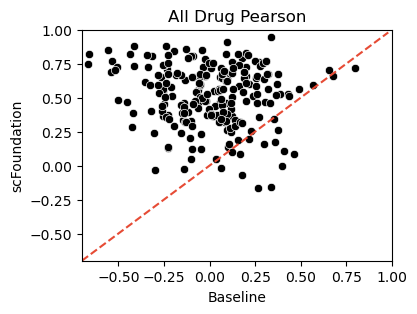

In [29]:
rest_drug = []
np.random.seed(0)
for can in alldrug:
    selectmeta = metadata_test[metadata_test.pubchem_id==can].copy()
    scFoundationpear = pearsonr(selectmeta.IC50_50M_01Bres.values+np.random.normal(scale=1e-8,size=selectmeta.IC50_Base.shape[0]),selectmeta.IC50.values)[0]
    scFoundationspear = spearmanr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    basepear = pearsonr(selectmeta.IC50_Base.values+np.random.normal(scale=1e-8,size=selectmeta.IC50_Base.shape[0]),selectmeta.IC50.values)[0]
    basespear = spearmanr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    rest_drug.append([can,scFoundationpear,scFoundationspear,basepear,basespear,scFoundationpear-basepear,scFoundationspear-basespear,selectmeta.shape[0]])
rest_drug = pd.DataFrame(rest_drug,columns=['Name','scFoundation_P','scFoundation_S','Base_P','Base_S','Diff_P','Diff_S','Num'])

figsize(4,3)
sns.scatterplot(data=rest_drug,x='Base_P',y='scFoundation_P',color='black')
sns.lineplot(x=[-0.7,0.98],y=[-0.7,0.98],linestyle='--')
plt.title('All Drug Pearson')
plt.xlabel('Baseline')
plt.ylabel('scFoundation')
plt.xlim(-0.7,1)
plt.ylim(-0.7,1)

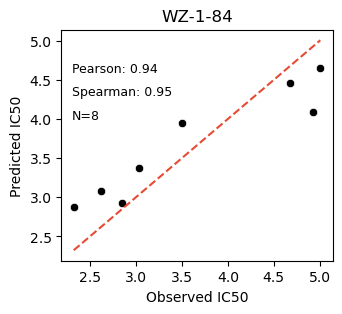

In [33]:
drg = '49821040'
selectmeta = metadata_test[metadata_test.pubchem_id==drg].copy()
figsize(3.5,3)
sns.lineplot(x=[selectmeta.IC50.min(),selectmeta.IC50.max()],y=[selectmeta.IC50.min(),selectmeta.IC50.max()],linestyle='--')
sns.scatterplot(data=selectmeta,x='IC50',y='IC50_50M_01Bres',color='black')
plt.title('WZ-1-84')
plt.xlabel('Observed IC50')
plt.ylabel('Predicted IC50')

pcc = pearsonr(selectmeta.IC50,selectmeta.IC50_50M_01Bres)[0]
spe = spearmanr(selectmeta.IC50,selectmeta.IC50_50M_01Bres)[0]

plt.text(2.3,4.6,f'Pearson: {pcc:.2f}',fontsize=9)
plt.text(2.3,4.3,f'Spearman: {spe:.2f}',fontsize=9)
plt.text(2.3,4,f'N={selectmeta.shape[0]}',fontsize=9)
plt.grid(False)

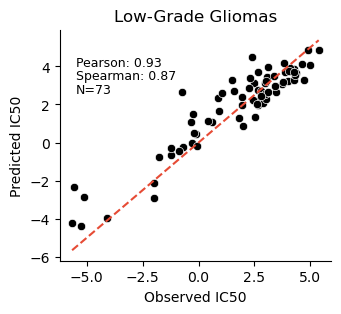

In [35]:
can = 'LGG'
selectmeta = metadata_test[metadata_test.Cancer_type==can].copy()
figsize(3.5,3)
sns.lineplot(x=[selectmeta.IC50.min(),selectmeta.IC50.max()],y=[selectmeta.IC50.min(),selectmeta.IC50.max()],linestyle='--')
sns.scatterplot(data=selectmeta,x='IC50',y='IC50_50M_01Bres',color='black')
plt.title('Low-Grade Gliomas')
plt.xlabel('Observed IC50')
plt.ylabel('Predicted IC50')

pcc = pearsonr(selectmeta.IC50,selectmeta.IC50_50M_01Bres)[0]
spe = spearmanr(selectmeta.IC50,selectmeta.IC50_50M_01Bres)[0]

plt.text(-5.5,4,f'Pearson: {pcc:.2f}',fontsize=9)
plt.text(-5.5,3.3,f'Spearman: {spe:.2f}',fontsize=9)
plt.text(-5.5,2.6,f'N={selectmeta.shape[0]}',fontsize=9)

plt.grid(False)

### Leave Drug

In [36]:
leave_drug = []
leaved2 = []
for x in alldrug:
    try:
        baseleave_npz = np.load(f'/nfs/DeepCDR/DeepCDR-master/data/leave_drug/Leave_{x}_DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP.npz')
        predall_npz = np.load(f'/nfs/DeepCDR/DeepCDR-master/data/leave_drug/Leave_{x}_DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_50M-0.1B-res.npz')
        basepear = pearsonr(baseleave_npz['test'],baseleave_npz['pred'])[0]
        scFoundationpear = pearsonr(predall_npz['test'],predall_npz['pred'])[0]
        if x == 'ALL':
            x = 'Nonspecific'
        leave_drug.append([x,'base',basepear])
        leave_drug.append([x,'scFoundation',scFoundationpear])
        leaved2.append([x,basepear,scFoundationpear,scFoundationpear-basepear,predall_npz['test'].shape[0]])
    except:
        print(x)

leave_drugdf = pd.DataFrame(leave_drug,columns=['name','mode','pearson'])
leaved2 = pd.DataFrame(leaved2,columns=['name','base','scFoundation','diff','num'])

<AxesSubplot:ylabel='diff'>

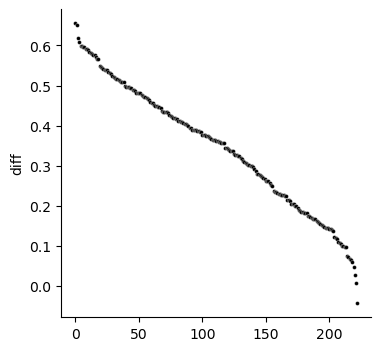

In [37]:
figsize(4,4)
leaved2.sort_values('diff',ascending=False,inplace=True)
sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['diff'],color='black',s=8)

<AxesSubplot:xlabel='mode', ylabel='pearson'>

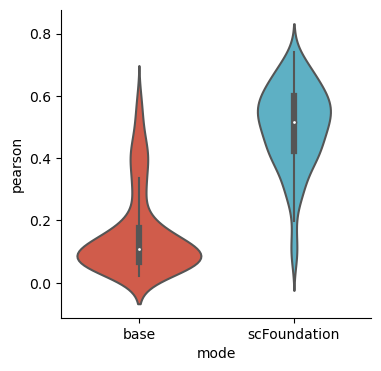

In [38]:
sns.violinplot(data=leave_drugdf,x='mode',y='pearson')

In [39]:
drugmeta = pd.read_csv('/nfs/DeepCDR/DeepCDR-master/data/anti_drug.info',sep='\t',header=None)
drugmeta.columns=['id','pub_id','drugname']

In [40]:
Topoisomerase_inhibitorsl_ll =['Etoposide',
'Camptothecir',
'Irinotecan',
'Topotecan',
'SN-38',
'Mitoxantrone',
'Teniposide']

Alkylating_agents=[
'Cisplatin',
'Oxaliplatin',
'Temozolomide',
'Cyclophosphamide',
'Carmustine',
]

Anti_tumor_Antibiotics=[
'Gemcitabine',
'Pemetrexeo',
'Methotrexate',
'Leflunomide',
'Nelarabine']

Anti_metabolites=[
'Bleomycin',
'Mitomycin-C',
'DoxorubicinEpirubicin']

In [41]:
Topoisomerase_inhibitorsl_ll = [
    x for x in Topoisomerase_inhibitorsl_ll if x in drugmeta.drugname.tolist()]

Alkylating_agents = [
    x for x in Alkylating_agents if x in drugmeta.drugname.tolist()]

Anti_tumor_Antibiotics = [
    x for x in Anti_tumor_Antibiotics if x in drugmeta.drugname.tolist()]

Anti_metabolites = [
    x for x in Anti_metabolites if x in drugmeta.drugname.tolist()]

Chemotherapy = Topoisomerase_inhibitorsl_ll+Alkylating_agents+Anti_tumor_Antibiotics+Anti_metabolites

In [42]:
Topoisomerase_inhibitorsl_ll,Alkylating_agents,Anti_tumor_Antibiotics,Anti_metabolites,Chemotherapy

(['Etoposide', 'SN-38'],
 ['Cisplatin', 'Temozolomide'],
 ['Gemcitabine', 'Methotrexate'],
 ['Bleomycin', 'Mitomycin-C'],
 ['Etoposide',
  'SN-38',
  'Cisplatin',
  'Temozolomide',
  'Gemcitabine',
  'Methotrexate',
  'Bleomycin',
  'Mitomycin-C'])

In [43]:
PAPR_inhibitors=[
'Olaparib',
'Talazoparib',
'Veliparib',
'PARP_9495',
'PARP_0108',
'PARP_9482'
]

CHK112_Wee1_inhibitors=['AZD7762',
'Wee1_inhibitor',
'MK-8776',
'MK-1775']

ATM_inhibitors = ['CP466722','KU-60019','KU-55933']
ATR_inhibitors = ['VE821','VE-822','AZD6738','AZ20']

PAPR_inhibitors = [
    x for x in PAPR_inhibitors if x in drugmeta.drugname.tolist()]

CHK112_Wee1_inhibitors = [
    x for x in CHK112_Wee1_inhibitors if x in drugmeta.drugname.tolist()]

ATM_inhibitors = [
    x for x in ATM_inhibitors if x in drugmeta.drugname.tolist()]

ATR_inhibitors = [
    x for x in ATR_inhibitors if x in drugmeta.drugname.tolist()]

Targettherapy = PAPR_inhibitors+CHK112_Wee1_inhibitors+ATM_inhibitors+ATR_inhibitors

PAPR_inhibitors,CHK112_Wee1_inhibitors,ATM_inhibitors,ATR_inhibitors,Targettherapy

(['Olaparib', 'Talazoparib', 'Veliparib'],
 ['AZD7762'],
 ['CP466722', 'KU-55933'],
 [],
 ['Olaparib', 'Talazoparib', 'Veliparib', 'AZD7762', 'CP466722', 'KU-55933'])

In [44]:
tmpdf = drugmeta[['pub_id','drugname']].copy()
tmpdf.index = tmpdf.pub_id.astype(str)
tmpdf.drop_duplicates(inplace=True)

In [45]:
leave_drugdf['drugname'] = tmpdf.loc[leave_drugdf['name'].tolist(),'drugname'].tolist()

In [46]:
leave_drugdf['drugtype_lv1']='NA'
leave_drugdf.loc[leave_drugdf.drugname.isin(Chemotherapy),'drugtype_lv1']='Chemotherapy'
leave_drugdf.loc[leave_drugdf.drugname.isin(Targettherapy),'drugtype_lv1']='Targettherapy'

leave_drugdf['drugtype_lv2']='NA'
leave_drugdf.loc[leave_drugdf.drugname.isin(Topoisomerase_inhibitorsl_ll),'drugtype_lv2']='Topoisomerase_inhibitorsl_ll'
leave_drugdf.loc[leave_drugdf.drugname.isin(Alkylating_agents),'drugtype_lv2']='Alkylating_agents'
leave_drugdf.loc[leave_drugdf.drugname.isin(Anti_tumor_Antibiotics),'drugtype_lv2']='Anti_tumor_Antibiotics'
leave_drugdf.loc[leave_drugdf.drugname.isin(Anti_metabolites),'drugtype_lv2']='Anti_metabolites'
leave_drugdf.loc[leave_drugdf.drugname.isin(PAPR_inhibitors),'drugtype_lv2']='PAPR_inhibitors'
leave_drugdf.loc[leave_drugdf.drugname.isin(CHK112_Wee1_inhibitors),'drugtype_lv2']='CHK112_Wee1_inhibitors'
leave_drugdf.loc[leave_drugdf.drugname.isin(ATM_inhibitors),'drugtype_lv2']='ATM_inhibitors'
leave_drugdf.loc[leave_drugdf.drugname.isin(ATR_inhibitors),'drugtype_lv2']='ATR_inhibitors'

In [48]:
leaved2['drugname'] = tmpdf.loc[leaved2['name'].tolist(),'drugname'].tolist()

leaved2['drugtype_lv1']='NA'
leaved2.loc[leaved2.drugname.isin(Chemotherapy),'drugtype_lv1']='Chemotherapy'
leaved2.loc[leaved2.drugname.isin(Targettherapy),'drugtype_lv1']='Targettherapy'

leaved2['drugtype_lv2']='NA'
leaved2.loc[leaved2.drugname.isin(Topoisomerase_inhibitorsl_ll),'drugtype_lv2']='Topoisomerase_inhibitorsl_ll'
leaved2.loc[leaved2.drugname.isin(Alkylating_agents),'drugtype_lv2']='Alkylating_agents'
leaved2.loc[leaved2.drugname.isin(Anti_tumor_Antibiotics),'drugtype_lv2']='Anti_tumor_Antibiotics'
leaved2.loc[leaved2.drugname.isin(Anti_metabolites),'drugtype_lv2']='Anti_metabolites'
leaved2.loc[leaved2.drugname.isin(PAPR_inhibitors),'drugtype_lv2']='PAPR_inhibitors'
leaved2.loc[leaved2.drugname.isin(CHK112_Wee1_inhibitors),'drugtype_lv2']='CHK112_Wee1_inhibitors'
leaved2.loc[leaved2.drugname.isin(ATM_inhibitors),'drugtype_lv2']='ATM_inhibitors'

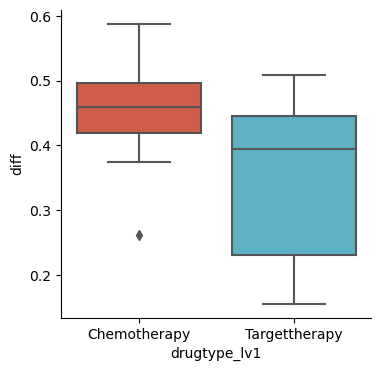

In [50]:
ax = sns.boxplot(data=leaved2.loc[leaved2.drugtype_lv1!='NA'],x='drugtype_lv1',y='diff')

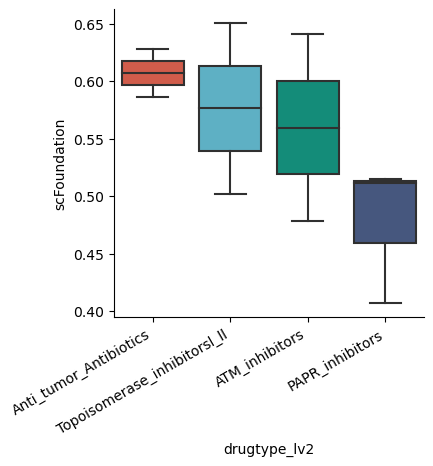

In [51]:
figsize(4,4)
ax = sns.boxplot(data=leaved2.loc[leaved2.drugtype_lv2.isin(['Anti_tumor_Antibiotics','Topoisomerase_inhibitorsl_ll','ATM_inhibitors','PAPR_inhibitors'])],x='drugtype_lv2',y='scFoundation')
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right');

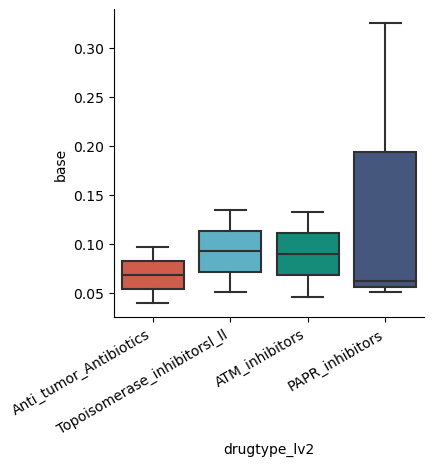

In [52]:
figsize(4,4)
ax = sns.boxplot(data=leaved2.loc[leaved2.drugtype_lv2.isin(['Anti_tumor_Antibiotics','Topoisomerase_inhibitorsl_ll','ATM_inhibitors','PAPR_inhibitors'])],x='drugtype_lv2',y='base')
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right');

## Pred NEW

In [54]:
rest_cellline = []
for can in allcellline:
    selectmeta = metadata_test[metadata_test.CellLine==can].copy()
    if selectmeta.shape[0]<2:
        continue
    scFoundationpear = pearsonr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    scFoundationspear = spearmanr(selectmeta.IC50_50M_01Bres.values,selectmeta.IC50.values)[0]
    basepear = pearsonr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    basespear = spearmanr(selectmeta.IC50_Base.values,selectmeta.IC50.values)[0]
    rest_cancer.append([can,scFoundationpear,scFoundationspear,basepear,basespear,scFoundationpear-basepear,scFoundationspear-basespear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','scFoundation_P','scFoundation_S','Base_P','Base_S','Diff_P','Diff_S'])

/tmp/ipykernel_4023/3384099013.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rest_cancer.append([can,scFoundationpear,scFoundationspear,basepear,basespear,scFoundationpear-basepear,scFoundationspear-basespear])


In [55]:
goodpreddrug = rest_drug.sort_values('scFoundation_P',ascending=False).Name.tolist()

In [57]:
refcellline = metadata_all.CellLine.unique().tolist()
allrepred = []
for gd in goodpreddrug:
    tmpmeta = metadata_all[metadata_all['pubchem_id']==gd].copy()
    repred = len(refcellline) - tmpmeta.CellLine.unique().shape[0]
    allrepred.append([gd,repred])

In [59]:
needpreddf = pd.DataFrame(allrepred,columns=['drug','num'])

In [60]:
drugmeta.index = drugmeta.pub_id.astype(str)

In [61]:
needpreddf['drugname'] = drugmeta[['pub_id','drugname']].drop_duplicates().loc[needpreddf.drug.tolist(),'drugname'].tolist()

In [62]:
import pandas as pd
import gseapy as gp

In [63]:
allpredmiss = []
for tmpdrug in needpreddf.drug.tolist():
    
    dname = drugmeta.loc[tmpdrug,'drugname']    
    tmpr = np.load(f'/nfs/DeepCDR/DeepCDR-master/data/Newpred_{tmpdrug}_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_50M-0.1B-res.npz')
    with open(f'/nfs/DeepCDR/DeepCDR-master/data/new/{tmpdrug}.pkl','rb') as f:
        tmpidx = pickle.load(f)
    tmpidx = pd.DataFrame(tmpidx)
    tmpidx['predIC50']=tmpr['pred']
    allpredmiss.append([tmpdrug,dname,tmpr['pred'].mean(),tmpr['pred'].shape[0]])

In [64]:
allpredmiss = pd.DataFrame(allpredmiss,columns=['chemid','drug','meanIC50','num'])
allpredmiss.sort_values('meanIC50')

,chemid,drug,meanIC50,num
128,387447,Bortezomib,-5.546119,365
35,448013,Epothilone B,-4.706630,56
199,148124,Docetaxel,-4.676667,86
59,104842,SN-38,-4.193063,17
72,6710780,Vinblastine,-3.701226,86
...,...,...,...,...
15,9910224,Zibotentan,5.857337,35
160,85668777,Cetuximab,5.989660,64
21,560326,DMOG,6.918732,53
181,8249,Phenformin,7.784282,44
